In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ODESolve as ODE
import derivatives as der

import os

from solveQKEs import solve_all_electron_ic, prob_plot

function ``solve_all_electron_ic``: Solves for initial conditions that's all $\nu_e$ (zero $\nu_\mu$) and all $\bar{\nu}_e$ if anti-neutrinos are calculated too:

Inputs:
- Temperature in MeV
- Include thermal term (``True`` or ``False``)
- Include anti-neutrinos in the calculation (``True`` or ``False``)
- Folder name (Name of folder -- string -- where data will be stored)
- File name header (Name of file -- string -- data will be stored as: FolderName/FileName.npz; omit the .npz)

Optional Inputs:
- ``overwrite_file = False``: if the file already exists, should we overwrite the file?  Default is ``False``
- ``make_plot = True``: After running, make a plot of probability vs tau
- ``N = 100``: Number of modes
- ``Emax = 10``: Maximum $\epsilon$ value
- ``dm2 = dm2_atm``: $\Delta m^2$, set by default to $\Delta m^2_{\rm atm}$ global variable in ``solveQKEs.py``
- ``sin22th = sin22th_default``: $\sin^2 2 \theta$ set by default as 0.8 (per Synchronized Oscillations paper)

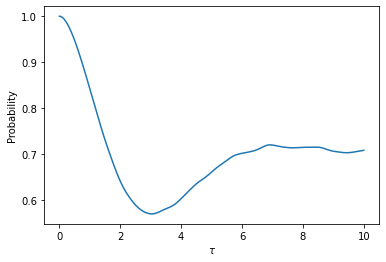

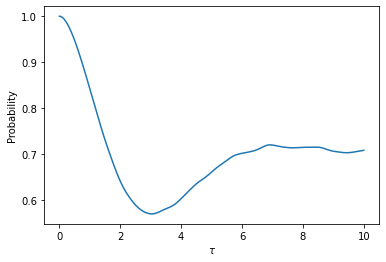

CPU times: user 14.2 s, sys: 100 ms, total: 14.3 s
Wall time: 14.3 s


In [2]:
%%time
solve_all_electron_ic(.1, True, True, "QKERun1", "test1", overwrite_file=True)

In [3]:
npz = np.load("QKERun1/test1.npz",allow_pickle=True)

In [4]:
npz.files

['settings', 'raw', 'prob']

In [5]:
d = npz['settings'].item()
r = npz['raw'].item()
p = npz['prob'].item()

In [6]:
print(d.keys())
print(r.keys())
print(p.keys())

dict_keys(['incl_thermal_term', 'incl_anti_neutrinos', 'N', 'eps_max', 'delta m-squared', 'sin2 (2th)', 'T'])
dict_keys(['time', 'dt', 'nu3D', 'nubar3D'])
dict_keys(['tau', 'prob_ve', 'prob_vebar'])


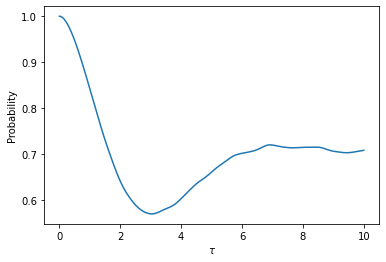

In [7]:
prob_plot(p['tau'], p['prob_ve'])